---

# 전처리 및 기초 데이터 시각화

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns

df = pd.read_csv('./data/pokedex_data.csv')

# font_path = '/Library/Fonts/Arial Unicode.ttf'      # mac 폰트 추가
font_path = 'C:\\Windows\\Fonts\\malgun.TTF'          # 한글 폰트를 적용하여 시각화
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# warnings 무시하기
import warnings
warnings.filterwarnings('ignore')

In [101]:
df

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,1,Ice,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1041,897,Spectrier,Phantoross,レイスポス (Reisuposu),8,Sub Legendary,Swift Horse Pokémon,1,Ghost,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1042,898,Calyrex,Coronospa,バドレックス (Budrex),8,Legendary,King Pokémon,2,Psychic,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1043,898,Calyrex Ice Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [102]:
df.columns      # 51개 컬럼명 확인

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [103]:
df_dropped = df.drop(columns=['Unnamed: 0', 'german_name', 'japanese_name', 'generation', 'status', 'species', 'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2', 'ability_hidden', 'catch_rate', 'base_friendship', 'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles'])
df_dropped.columns      # 능력치와 상성을 제외한 21개 컬럼 삭제

Index(['pokedex_number', 'name', 'type_number', 'type_1', 'type_2',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fight',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')

In [104]:
df_dropped

,pokedex_number,name,type_number,type_1,type_2,total_points,hp,attack,defense,sp_attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,2,Grass,Poison,318,45,49,49,65,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,2,Grass,Poison,405,60,62,63,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,2,Grass,Poison,525,80,82,83,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,2,Grass,Poison,625,80,100,123,122,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Fire,NaN,309,39,52,43,60,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,1,Ice,NaN,580,100,145,130,65,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,1,Ghost,NaN,580,100,65,60,145,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,2,Psychic,Grass,500,100,80,80,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,898,Calyrex Ice Rider,2,Psychic,Ice,680,100,165,150,85,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [105]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1045 non-null   int64  
 1   name              1045 non-null   object 
 2   type_number       1045 non-null   int64  
 3   type_1            1045 non-null   object 
 4   type_2            553 non-null    object 
 5   total_points      1045 non-null   int64  
 6   hp                1045 non-null   int64  
 7   attack            1045 non-null   int64  
 8   defense           1045 non-null   int64  
 9   sp_attack         1045 non-null   int64  
 10  sp_defense        1045 non-null   int64  
 11  speed             1045 non-null   int64  
 12  against_normal    1045 non-null   float64
 13  against_fire      1045 non-null   float64
 14  against_water     1045 non-null   float64
 15  against_electric  1045 non-null   float64
 16  against_grass     1045 non-null   float64


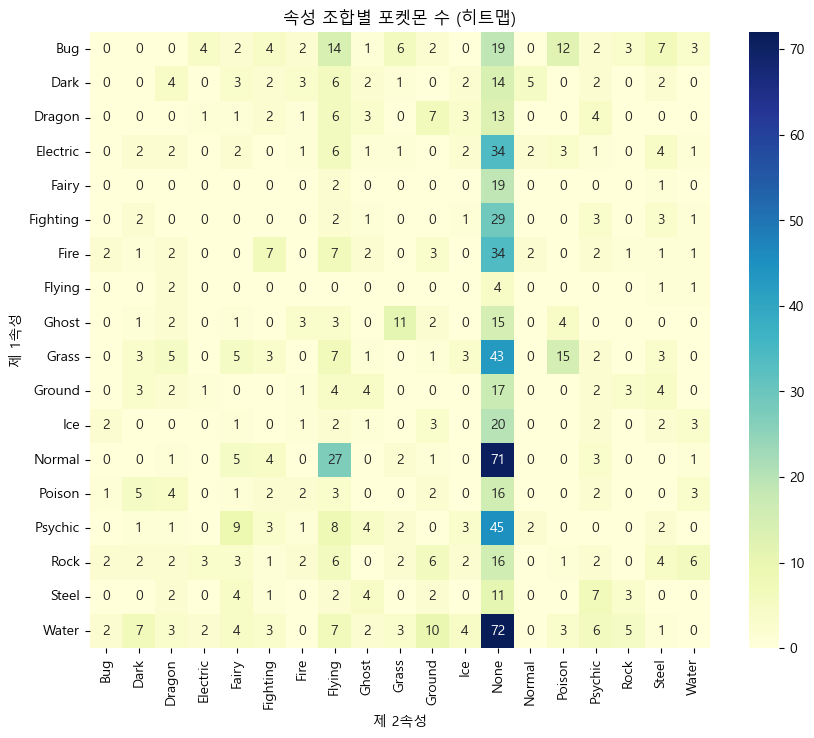

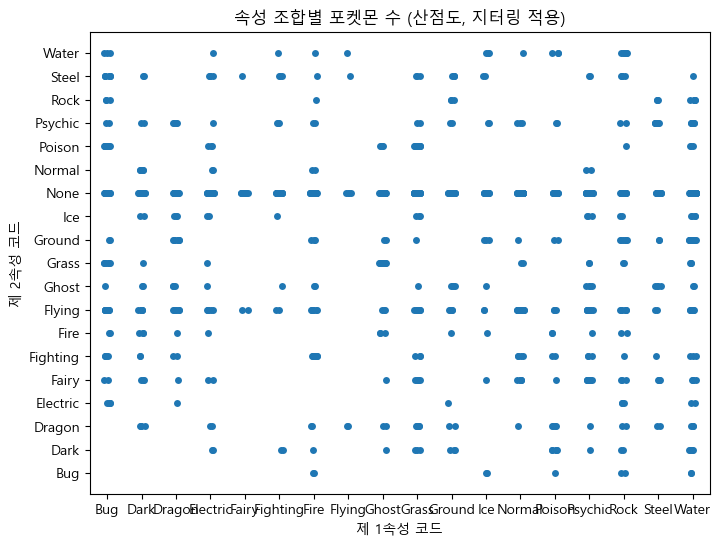

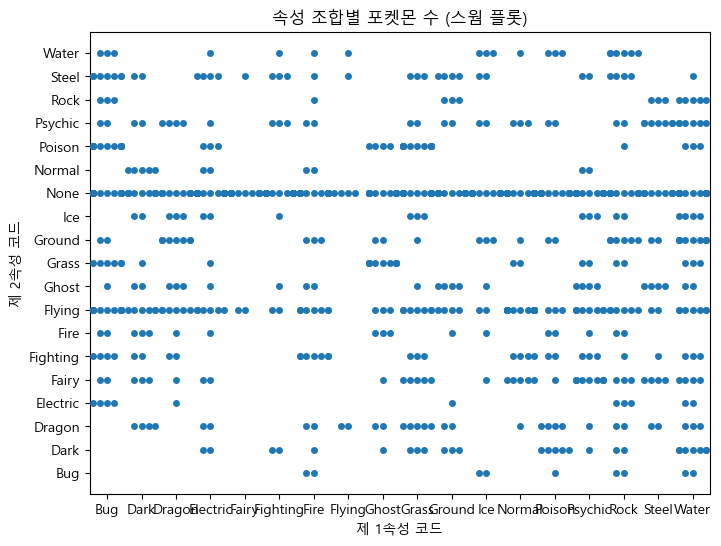

In [106]:
# type_2에 None 값이 있으므로 문자열 'None'으로 채우기
df_dropped['type_2'] = df_dropped['type_2'].fillna('None')

# 1. 히트맵
type_counts = df_dropped.groupby(['type_1', 'type_2']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(type_counts, annot=True, cmap='YlGnBu')
plt.title('속성 조합별 포켓몬 수 (히트맵)')
plt.xlabel('제 2속성')
plt.ylabel('제 1속성')
plt.show()

# 2. 산점도 (점 겹침 문제 발생 가능성 있음)
# type_1, type_2를 숫자로 변환 (카테고리 코드로 변환)
df_dropped['type_1_code'] = df_dropped['type_1'].astype('category').cat.codes
df_dropped['type_2_code'] = df_dropped['type_2'].astype('category').cat.codes

# 지터링을 적용한 산점도
plt.figure(figsize=(8, 6))
sns.stripplot(x='type_1_code', y='type_2_code', data=df_dropped, jitter=True)
plt.title('속성 조합별 포켓몬 수 (산점도, 지터링 적용)')
plt.xlabel('제 1속성 코드')
plt.ylabel('제 2속성 코드')

# x, y축 눈금 레이블을 원래 속성 이름으로 변경
type_1_categories = df_dropped['type_1'].astype('category').cat.categories
type_2_categories = df_dropped['type_2'].astype('category').cat.categories
plt.xticks(range(len(type_1_categories)), type_1_categories)
plt.yticks(range(len(type_2_categories)), type_2_categories)

plt.show()

# 스웜 플롯 (점 겹침을 더 효과적으로 해결)
plt.figure(figsize=(8, 6))
sns.swarmplot(x='type_1_code', y='type_2_code', data=df_dropped)
plt.title('속성 조합별 포켓몬 수 (스웜 플롯)')
plt.xlabel('제 1속성 코드')
plt.ylabel('제 2속성 코드')
plt.xticks(range(len(type_1_categories)), type_1_categories)
plt.yticks(range(len(type_2_categories)), type_2_categories)
plt.show()

In [107]:
df_dropped_single = df_dropped[df_dropped['type_2'] == 'None']
df_dropped_single

# type_mix 컬럼 생성
df_dropped_single['type_only'] = df_dropped_single['type_1']

# 컬럼 재정렬: type_mix 컬럼을 5번 위치로 이동
cols = df_dropped_single.columns.tolist() # 컬럼 이름 목록 가져오기
cols.insert(1, cols.pop(cols.index('type_only'))) # 'type_mix' 컬럼을 5번 위치로 이동 (0부터 시작)
df_dropped_single = df_dropped_single[cols] # 변경된 컬럼 순서로 데이터프레임 재정렬

# type_1 컬럼과 type_2 컬럼을 없애기
df_dropped_single = df_dropped_single.drop(columns=['type_1', 'type_2']) # columns= 를 사용하여 컬럼 지정

selected_cols = ['name', 'type_only', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
df_dropped_single = df_dropped_single[selected_cols]
df_dropped_single

,name,type_only,total_points,hp,attack,defense,sp_attack,sp_defense,speed
4,Charmander,Fire,309,39,52,43,60,50,65
5,Charmeleon,Fire,405,58,64,58,80,65,80
9,Squirtle,Water,314,44,48,65,50,64,43
10,Wartortle,Water,405,59,63,80,65,80,58
11,Blastoise,Water,530,79,83,100,85,105,78
...,...,...,...,...,...,...,...,...,...
1034,Kubfu,Fighting,385,60,90,60,53,50,72
1038,Regieleki,Electric,580,80,100,50,100,50,200
1039,Regidrago,Dragon,580,200,100,50,100,50,80
1040,Glastrier,Ice,580,100,145,130,65,110,30


In [108]:
df_dropped_double = df_dropped[df_dropped['type_2'] != 'None']
df_dropped_double

# type_mix 컬럼 생성
df_dropped_double['type_mix'] = list(zip(df_dropped_double['type_1'], df_dropped_double['type_2']))

# 컬럼 재정렬: type_mix 컬럼을 5번 위치로 이동
cols = df_dropped_double.columns.tolist() # 컬럼 이름 목록 가져오기
cols.insert(1, cols.pop(cols.index('type_mix'))) # 'type_mix' 컬럼을 5번 위치로 이동 (0부터 시작)
df_dropped_double = df_dropped_double[cols] # 변경된 컬럼 순서로 데이터프레임 재정렬

# type_1 컬럼과 type_2 컬럼을 없애기
df_dropped_double = df_dropped_double.drop(columns=['type_1', 'type_2']) # columns= 를 사용하여 컬럼 지정

selected_cols = ['name', 'type_mix', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
df_dropped_double = df_dropped_double[selected_cols]
df_dropped_double

,name,type_mix,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Bulbasaur,"(Grass, Poison)",318,45,49,49,65,65,45
1,Ivysaur,"(Grass, Poison)",405,60,62,63,80,80,60
2,Venusaur,"(Grass, Poison)",525,80,82,83,100,100,80
3,Mega Venusaur,"(Grass, Poison)",625,80,100,123,122,120,80
6,Charizard,"(Fire, Flying)",534,78,84,78,109,85,100
...,...,...,...,...,...,...,...,...,...
1036,Urshifu Rapid Strike Style,"(Fighting, Water)",550,100,130,100,63,60,97
1037,Zarude,"(Dark, Grass)",600,105,120,105,70,95,105
1042,Calyrex,"(Psychic, Grass)",500,100,80,80,80,80,80
1043,Calyrex Ice Rider,"(Psychic, Ice)",680,100,165,150,85,130,50


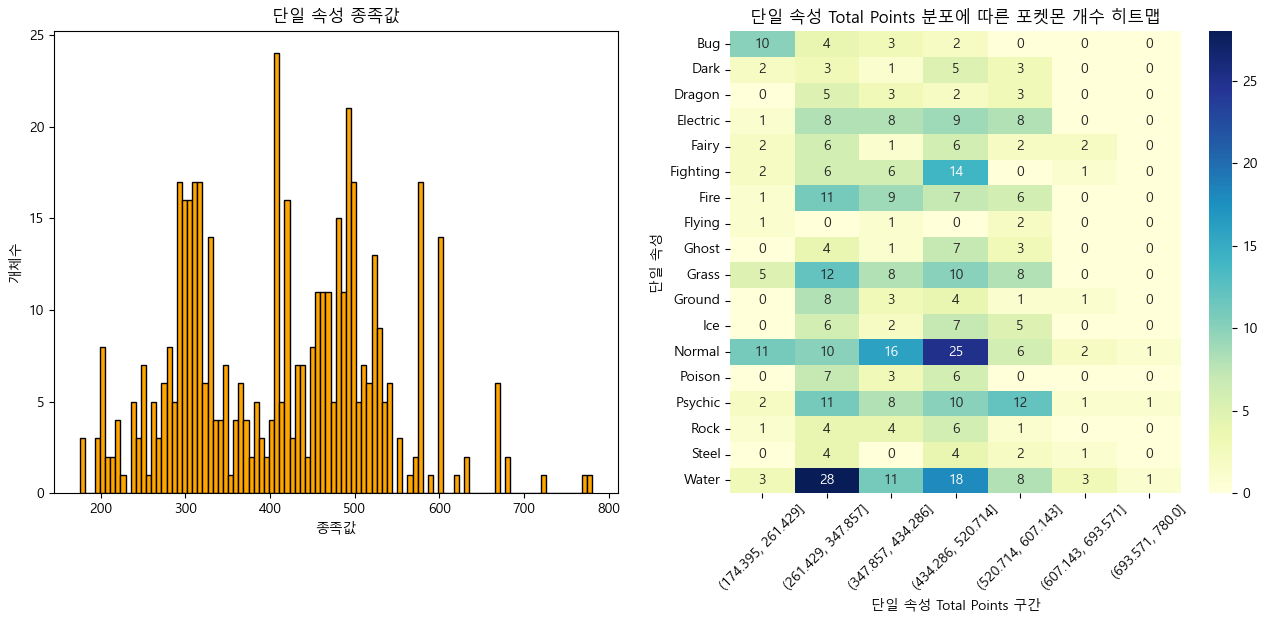

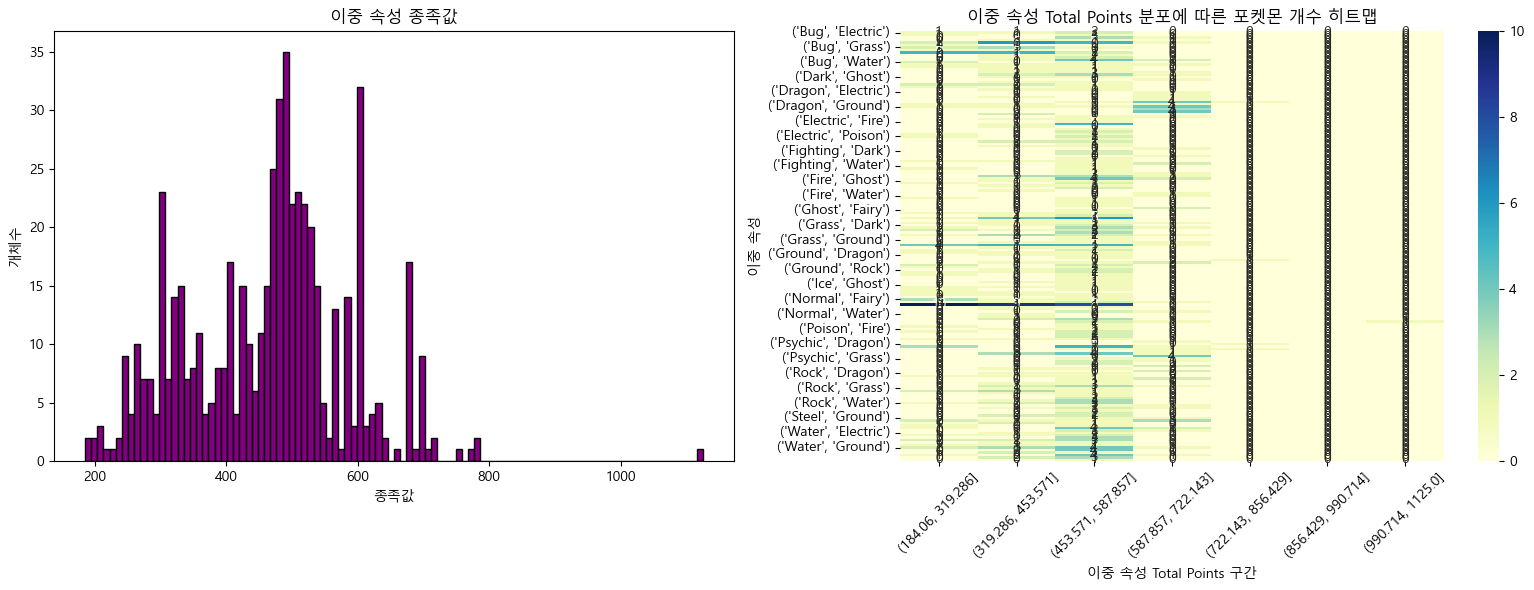

In [109]:
# 단일 속성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df_dropped_single['total_points'], bins=100, color='orange', edgecolor='black')
axes[0].set_title('단일 속성 종족값')
axes[0].set_xlabel('종족값')
axes[0].set_ylabel('개체수')

# `total_points`를 7개의 구간으로 나누기 (bins=7)
df_dropped_single['total_points_bin'] = pd.cut(df_dropped_single['total_points'], bins=7)

# 싱글속성(type_only)과 `total_points_bin`을 그룹화하여 개체 수 계산
type_points_counts = df_dropped_single.groupby(['type_only', 'total_points_bin']).size().unstack(fill_value=0)

sns.heatmap(type_points_counts, annot=True, cmap='YlGnBu', fmt='d', ax=axes[1])

axes[1].set_title('단일 속성 Total Points 분포에 따른 포켓몬 개수 히트맵')
axes[1].set_xlabel('단일 속성 Total Points 구간')
axes[1].set_ylabel('단일 속성')
axes[1].tick_params(axis='x', rotation=45)


# -----------------------------------------------------------------------------------------------------------------

# 이중속성

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df_dropped_double['total_points'], bins=100, color='purple', edgecolor='black')
axes[0].set_title('이중 속성 종족값')
axes[0].set_xlabel('종족값')
axes[0].set_ylabel('개체수')

df_dropped_double['total_points_bin'] = pd.cut(df_dropped_double['total_points'], bins=7)

# 이중속성(type_mix)과 `total_points_bin`을 그룹화하여 개체 수 계산
type_points_counts = df_dropped_double.groupby(['type_mix', 'total_points_bin']).size().unstack(fill_value=0)

sns.heatmap(type_points_counts, annot=True, cmap='YlGnBu', fmt='d', ax=axes[1])

axes[1].set_title('이중 속성 Total Points 분포에 따른 포켓몬 개수 히트맵')
axes[1].set_xlabel('이중 속성 Total Points 구간')
axes[1].set_ylabel('이중 속성')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [110]:
df_dropped_single

,name,type_only,total_points,hp,attack,defense,sp_attack,sp_defense,speed,total_points_bin
4,Charmander,Fire,309,39,52,43,60,50,65,"(261.429, 347.857]"
5,Charmeleon,Fire,405,58,64,58,80,65,80,"(347.857, 434.286]"
9,Squirtle,Water,314,44,48,65,50,64,43,"(261.429, 347.857]"
10,Wartortle,Water,405,59,63,80,65,80,58,"(347.857, 434.286]"
11,Blastoise,Water,530,79,83,100,85,105,78,"(520.714, 607.143]"
...,...,...,...,...,...,...,...,...,...,...
1034,Kubfu,Fighting,385,60,90,60,53,50,72,"(347.857, 434.286]"
1038,Regieleki,Electric,580,80,100,50,100,50,200,"(520.714, 607.143]"
1039,Regidrago,Dragon,580,200,100,50,100,50,80,"(520.714, 607.143]"
1040,Glastrier,Ice,580,100,145,130,65,110,30,"(520.714, 607.143]"


In [111]:
df_dropped_double

,name,type_mix,total_points,hp,attack,defense,sp_attack,sp_defense,speed,total_points_bin
0,Bulbasaur,"(Grass, Poison)",318,45,49,49,65,65,45,"(184.06, 319.286]"
1,Ivysaur,"(Grass, Poison)",405,60,62,63,80,80,60,"(319.286, 453.571]"
2,Venusaur,"(Grass, Poison)",525,80,82,83,100,100,80,"(453.571, 587.857]"
3,Mega Venusaur,"(Grass, Poison)",625,80,100,123,122,120,80,"(587.857, 722.143]"
6,Charizard,"(Fire, Flying)",534,78,84,78,109,85,100,"(453.571, 587.857]"
...,...,...,...,...,...,...,...,...,...,...
1036,Urshifu Rapid Strike Style,"(Fighting, Water)",550,100,130,100,63,60,97,"(453.571, 587.857]"
1037,Zarude,"(Dark, Grass)",600,105,120,105,70,95,105,"(587.857, 722.143]"
1042,Calyrex,"(Psychic, Grass)",500,100,80,80,80,80,80,"(453.571, 587.857]"
1043,Calyrex Ice Rider,"(Psychic, Ice)",680,100,165,150,85,130,50,"(587.857, 722.143]"


---

# 지도 학습 및 시각화 (단일 속성)

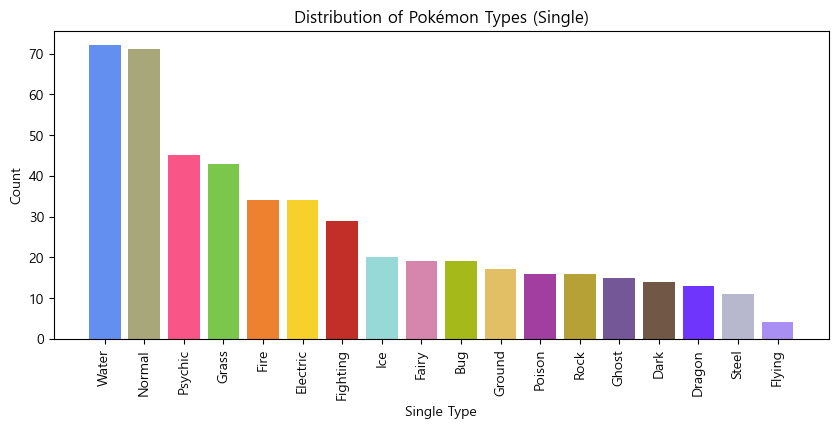

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

type_counts_single = df_dropped_single['type_only'].value_counts()

types = type_counts_single.index
counts = type_counts_single.values

type_colors = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Electric': '#F7D02C',
    'Grass': '#7AC74C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD'
}

colors = [type_colors.get(typ, 'gray') for typ in types]

plt.figure(figsize=(10, 4))
plt.bar(types, counts, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Single Type')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Types (Single)')

plt.show()

In [113]:
label_data_single = df_dropped_single.groupby('type_only')['total_points'].max() 
label_data_single

type_only
Bug         500
Dark        600
Dragon      600
Electric    600
Fairy       680
Fighting    670
Fire        580
Flying      580
Ghost       580
Grass       600
Ground      670
Ice         580
Normal      720
Poison      500
Psychic     780
Rock        580
Steel       630
Water       770
Name: total_points, dtype: int64

In [114]:
# 1. 각 단일 속성별로 total 점수가 가장 높은 포켓몬 찾기
# df_dropped_single['max_total_per_single_type'] = df_dropped_single.groupby('type_only')['total_points'].max() 
df_dropped_single['max_total_per_single_type'] = df_dropped_single.groupby('type_only')['total_points'].transform('max')

# 2. 라벨 생성: 단일 속성별로 가장 높은 total 값을 가진 포켓몬을 1, 나머지는 0
df_dropped_single['label'] = (df_dropped_single['total_points'] == df_dropped_single['max_total_per_single_type']).astype(int)

# 3. 모델 학습에 사용할 특성 (total_points, hp, attack, defense 사용)
X = df_dropped_single.drop(columns=['name', 'type_only', 'total_points_bin', 'max_total_per_single_type', 'label'])

# 4. 라벨 
y = df_dropped_single['label']

# 5. 데이터 분할 (훈련 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. 데이터 정규화 (스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 9. 예측 및 평가
y_pred = model.predict(X_test_scaled)

# 10. 정확도
accuracy = accuracy_score(y_test, y_pred)

# 11. 그 외 평가지수
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 정확도, 정밀도, 재현울 계산 변수 선언
accuracy_data = accuracy * 100
precision_data = precision * 100
recall_data = recall * 100

정확도: 93.9189%
정밀도: 28.5714%
재현율: 33.3333%
F1 Score: 30.7692
Predictions: [0 0 0 0 0 0 0 0 0 0]
True Labels: [0 1 0 0 0 0 0 0 0 0]


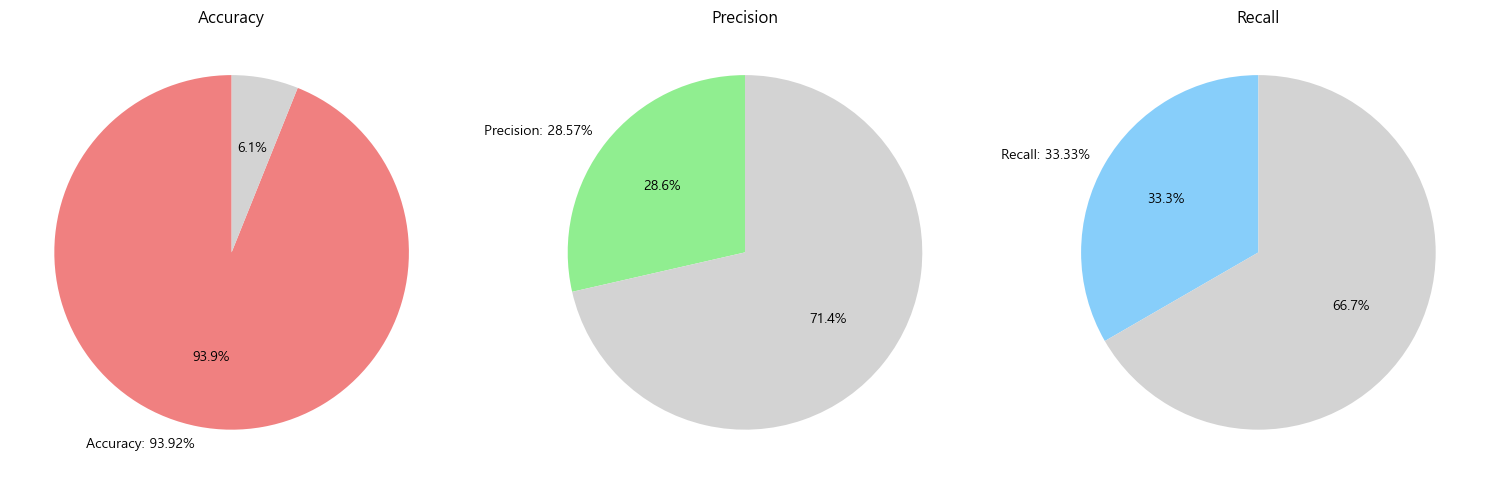

In [115]:
# 12. 모델 평가
print(f'정확도: {accuracy_data:.4f}%')
print(f"정밀도: {precision_data:.4f}%")
print(f'재현율: {recall_data:.4f}%')
print(f"F1 Score: {f1 * 100:.4f}")
print(f'Predictions: {y_pred[:10]}')
print(f'True Labels: {y_test[:10].values}')

# 13. 파이 플롯 시각화
plt.figure(figsize=(15, 5))

# 정확도 파이 차트
plt.subplot(1, 3, 1)
plt.pie([accuracy_data, 100 - accuracy_data], labels=[f'Accuracy: {accuracy_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgrey'])
plt.title("Accuracy")

# 정밀도 파이 차트
plt.subplot(1, 3, 2)
plt.pie([precision_data, 100 - precision_data], labels=[f'Precision: {precision_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightgrey'])
plt.title("Precision")

# 재현율 파이 차트
plt.subplot(1, 3, 3)
plt.pie([recall_data, 100 - recall_data], labels=[f'Recall: {recall_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightgrey'])
plt.title("Recall")

plt.tight_layout()
plt.show()

In [116]:
# 앙상블 모델 학습
knn_clf = KNeighborsClassifier(n_neighbors=7)
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('knn_clf', knn_clf),
        ('lr_clf', lr_clf),
        ('dt_clf', dt_clf)
    ],
    voting = 'hard'
)

voting_clf.fit(X_train_scaled, y_train)

y_pred_train = voting_clf.predict(X_train_scaled)
acc_score_train = accuracy_score(y_train, y_pred_train)
print(f'학습 점수: {acc_score_train:.4f}')

y_pred_test = voting_clf.predict(X_test_scaled)
acc_score_test = accuracy_score(y_test, y_pred_test)
print(f'테스트 평가 점수: {acc_score_test:.4f}')

학습 점수: 0.9680
테스트 평가 점수: 0.9459


앙상블 예측값: [0 0 0 0 0 0 0 0 0 0]
KNeighborsClassifier 개별 정확도: 95.2703%
KNeighborsClassifier 예측값: [0 0 0 0 0 0 0 0 0 0]
LogisticRegression 개별 정확도: 93.9189%
LogisticRegression 예측값: [0 0 0 0 0 0 0 0 0 0]
DecisionTreeClassifier 개별 정확도: 92.5676%
DecisionTreeClassifier 예측값: [0 0 0 0 1 0 0 0 0 0]


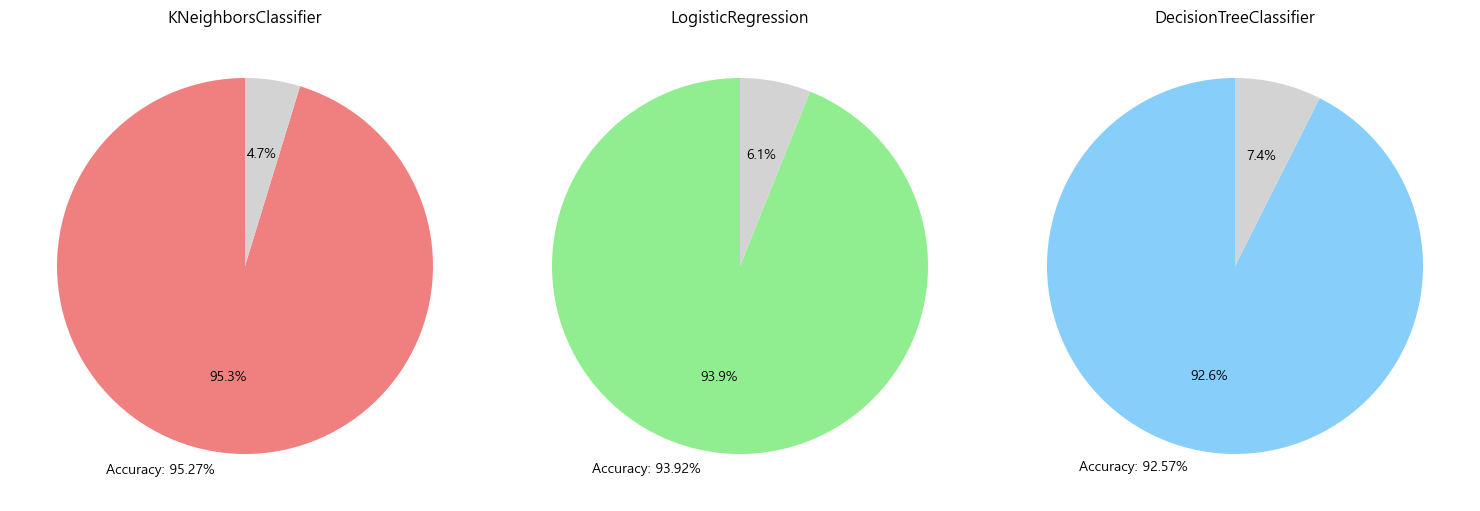

In [117]:
start, end = 10, 20

# 앙상블 예측값 출력
voting_clf_pred = voting_clf.predict(X_test_scaled[start:end])
print(f'앙상블 예측값: {voting_clf_pred}')



# knn_clf
# knn_clf 학습 및 예측
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)  # X_test_scaled로 예측

# knn_clf 정확도
acc_score_knn = accuracy_score(y_test, y_pred_knn)
class_name_knn = knn_clf.__class__.__name__


# lr_clf
# lr_clf 학습 및 예측
lr_clf.fit(X_train_scaled, y_train)
y_pred_lr = lr_clf.predict(X_test_scaled)  # X_test_scaled로 예측

# lr_clf 정확도
acc_score_lr = accuracy_score(y_test, y_pred_lr)
class_name_lr = lr_clf.__class__.__name__


# dt_clf
# dt_clf 학습 및 예측
dt_clf.fit(X_train_scaled, y_train)
y_pred_dt = dt_clf.predict(X_test_scaled)  # X_test_scaled로 예측

# dt_clf 정확도
acc_score_dt = accuracy_score(y_test, y_pred_dt)
class_name_dt = dt_clf.__class__.__name__



# 정확도, 정밀도, 재현울 계산 변수 선언
acc_score_knn_data = acc_score_knn * 100
acc_score_lr_data = acc_score_lr * 100
acc_score_dt_data = acc_score_dt * 100

# knn_clf 정확도값 출력
print(f'{class_name_knn} 개별 정확도: {acc_score_knn_data:.4f}%')
# knn_clf 예측값 출력
print(f'{class_name_knn} 예측값: {y_pred_knn[start:end]}')
# lr_clf 정확도 출력
print(f'{class_name_lr} 개별 정확도: {acc_score_lr_data:.4f}%')
# lr_clf 예측값 출력
print(f'{class_name_lr} 예측값: {y_pred_lr[start:end]}')
# dt_clf 정확도 출력
print(f'{class_name_dt} 개별 정확도: {acc_score_dt_data:.4f}%')
# dt_clf 예측값 출력
print(f'{class_name_dt} 예측값: {y_pred_dt[start:end]}')


# 12. 파이 플롯 시각화
plt.figure(figsize=(15, 5))

# KNeighborsClassifier 정확도 파이 차트
plt.subplot(1, 3, 1)
plt.pie([acc_score_knn_data, 100 - acc_score_knn_data], labels=[f'Accuracy: {acc_score_knn_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgrey'])
plt.title("KNeighborsClassifier")


# LogisticRegression 정확도 파이 차트
plt.subplot(1, 3, 2)
plt.pie([acc_score_lr_data, 100 - acc_score_lr_data], labels=[f'Accuracy: {acc_score_lr_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightgrey'])
plt.title("LogisticRegression")

# DecisionTreeClassifier 정확도 파이 차트
plt.subplot(1, 3, 3)
plt.pie([acc_score_dt_data, 100 - acc_score_dt_data], labels=[f'Accuracy: {acc_score_dt_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightgrey'])
plt.title("DecisionTreeClassifier")


plt.tight_layout()
plt.show()

---

# 지도 학습 및 시각화 (이중 속성)

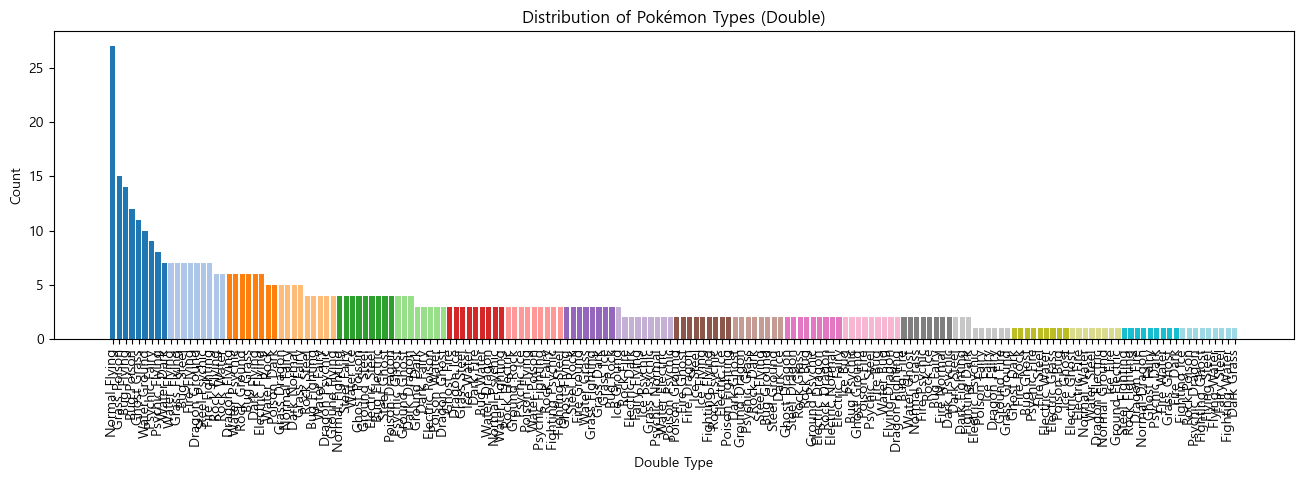

In [118]:
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

type_counts_double = df_dropped_double['type_mix'].value_counts()

types = [" ".join(type) for type in type_counts_double.index.to_list()]
counts = type_counts_double.values

# 색상 팔레트 선택
cmap_name = 'tab20'
cmap = cm.get_cmap(cmap_name)

# ListedColormap 객체 생성
num_colors = len(types)
cmap = ListedColormap(plt.cm.tab20(np.linspace(0, 1, num_colors)))

# 색상 목록 생성
colors = [cmap(i) for i in np.linspace(0, 1, num_colors)]

plt.figure(figsize=(16, 4))
plt.bar(types, counts, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Double Type')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Types (Double)')

plt.show()

In [119]:
label_data_double = df_dropped_double.groupby('type_mix')['total_points'].max() 
label_data_double

type_mix
(Bug, Electric)     500
(Bug, Fairy)        464
(Bug, Fighting)     600
(Bug, Fire)         550
(Bug, Flying)       600
                   ... 
(Water, Ice)        535
(Water, Poison)     515
(Water, Psychic)    590
(Water, Rock)       495
(Water, Steel)      530
Name: total_points, Length: 174, dtype: int64

In [120]:
# 1. 각 단일 속성별로 total 점수가 가장 높은 포켓몬 찾기
# df_dropped_double['max_total_per_double_type'] = df_dropped_double.groupby('type_mix')['total_points'].max() 
df_dropped_double['max_total_per_double_type'] = df_dropped_double.groupby('type_mix')['total_points'].transform('max')

# 2. 라벨 생성: 단일 속성별로 가장 높은 total 값을 가진 포켓몬을 1, 나머지는 0
df_dropped_double['label'] = (df_dropped_double['total_points'] == df_dropped_double['max_total_per_double_type']).astype(int)

# 3. 모델 학습에 사용할 특성 (total_points, hp, attack, defense 사용)
X = df_dropped_double.drop(columns=['name', 'type_mix', 'total_points_bin', 'max_total_per_double_type', 'label'])

# 4. 라벨 
y = df_dropped_double['label']

# 5. 데이터 분할 (훈련 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. 데이터 정규화 (스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 9. 예측 및 평가
y_pred = model.predict(X_test_scaled)

# 10. 정확도
accuracy = accuracy_score(y_test, y_pred)

# 11. 그 외 평가지수
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 정확도, 정밀도, 재현울 계산 변수 선언
accuracy_data = accuracy * 100
precision_data = precision * 100
recall_data = recall * 100

정확도: 78.9157%
정밀도: 73.9130%
재현율: 59.6491%
F1 Score: 66.0194
Predictions: [1 1 0 0 1 0 0 1 1 0]
True Labels: [1 1 0 0 1 0 0 1 1 0]


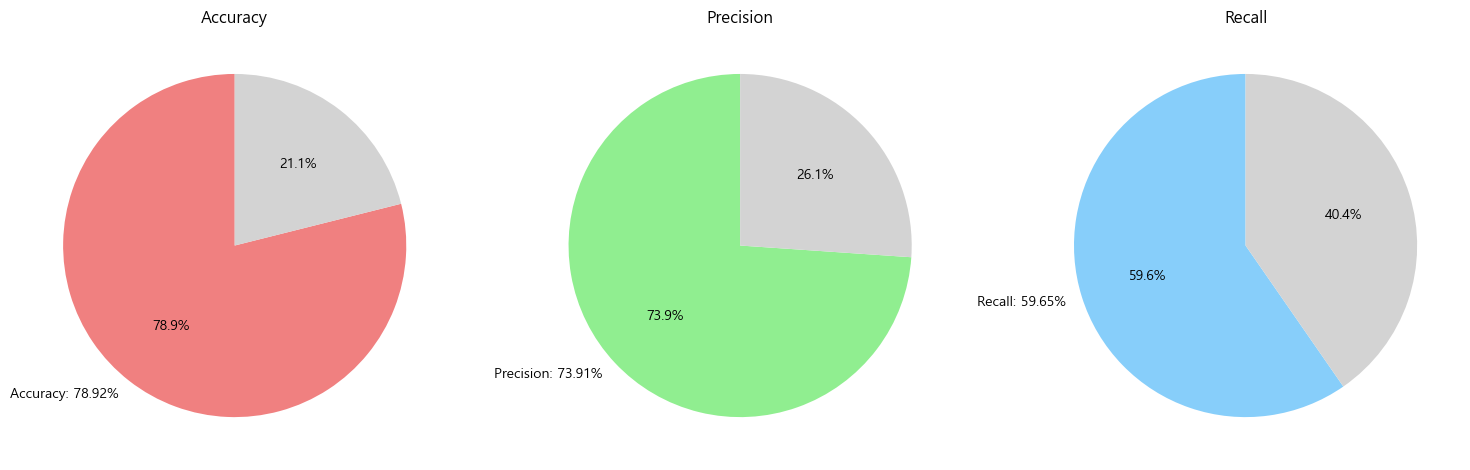

In [121]:
# 12. 모델 평가
print(f'정확도: {accuracy_data:.4f}%')
print(f"정밀도: {precision_data:.4f}%")
print(f'재현율: {recall_data:.4f}%')
print(f"F1 Score: {f1 * 100:.4f}")
print(f'Predictions: {y_pred[:10]}')
print(f'True Labels: {y_test[:10].values}')

# 13. 파이 플롯 시각화
plt.figure(figsize=(15, 5))

# 정확도 파이 차트
plt.subplot(1, 3, 1)
plt.pie([accuracy_data, 100 - accuracy_data], labels=[f'Accuracy: {accuracy_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgrey'])
plt.title("Accuracy")

# 정밀도 파이 차트
plt.subplot(1, 3, 2)
plt.pie([precision_data, 100 - precision_data], labels=[f'Precision: {precision_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightgrey'])
plt.title("Precision")

# 재현율 파이 차트
plt.subplot(1, 3, 3)
plt.pie([recall_data, 100 - recall_data], labels=[f'Recall: {recall_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightgrey'])
plt.title("Recall")

plt.tight_layout()
plt.show()

In [122]:
# 앙상블 모델 학습
knn_clf = KNeighborsClassifier(n_neighbors=7)
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('knn_clf', knn_clf),
        ('lr_clf', lr_clf),
        ('dt_clf', dt_clf)
    ],
    voting = 'hard'
)

voting_clf.fit(X_train_scaled, y_train)

y_pred_train = voting_clf.predict(X_train_scaled)
acc_score_train = accuracy_score(y_train, y_pred_train)
print(f'학습 점수: {acc_score_train:.4f}')

y_pred_test = voting_clf.predict(X_test_scaled)
acc_score_test = accuracy_score(y_test, y_pred_test)
print(f'테스트 평가 점수: {acc_score_test:.4f}')

학습 점수: 0.8811
테스트 평가 점수: 0.7590


앙상블 예측값: [0 0 1 0 0 0 0 1 1 0]
KNeighborsClassifier 개별 정확도: 71.6867%
KNeighborsClassifier 예측값: [0 0 1 0 0 0 0 1 1 0]
LogisticRegression 개별 정확도: 78.9157%
LogisticRegression 예측값: [0 0 1 0 0 0 0 1 0 0]
DecisionTreeClassifier 개별 정확도: 69.8795%
DecisionTreeClassifier 예측값: [0 0 1 0 0 0 0 1 1 1]


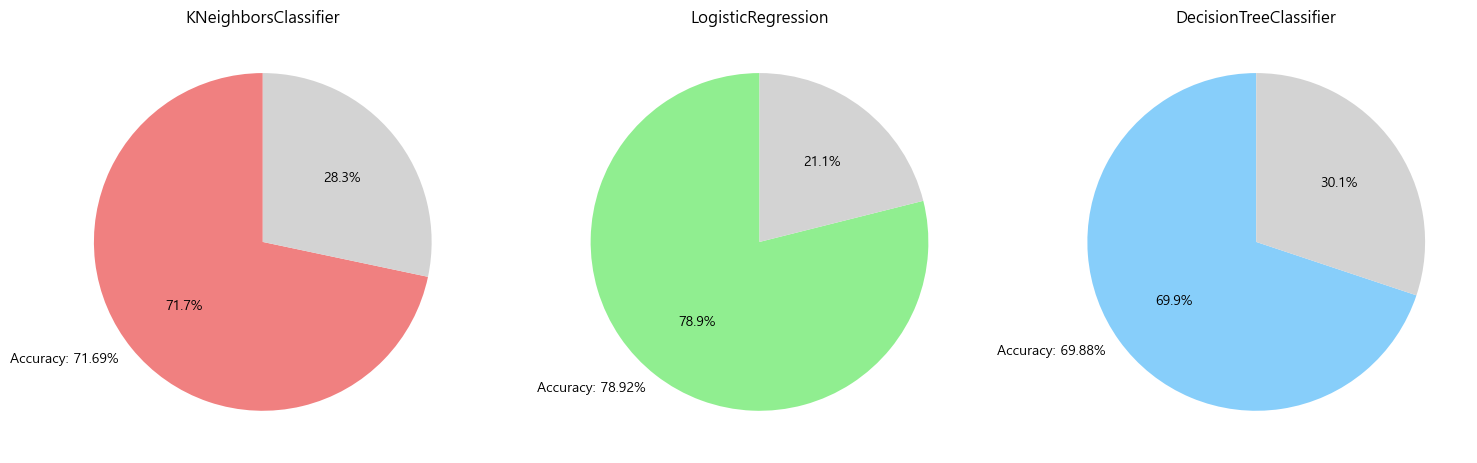

In [123]:
start, end = 10, 20

# 앙상블 예측값 출력
voting_clf_pred = voting_clf.predict(X_test_scaled[start:end])
print(f'앙상블 예측값: {voting_clf_pred}')



# knn_clf
# knn_clf 학습 및 예측
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)  # X_test_scaled로 예측

# knn_clf 정확도
acc_score_knn = accuracy_score(y_test, y_pred_knn)
class_name_knn = knn_clf.__class__.__name__


# lr_clf
# lr_clf 학습 및 예측
lr_clf.fit(X_train_scaled, y_train)
y_pred_lr = lr_clf.predict(X_test_scaled)  # X_test_scaled로 예측

# lr_clf 정확도
acc_score_lr = accuracy_score(y_test, y_pred_lr)
class_name_lr = lr_clf.__class__.__name__


# dt_clf
# dt_clf 학습 및 예측
dt_clf.fit(X_train_scaled, y_train)
y_pred_dt = dt_clf.predict(X_test_scaled)  # X_test_scaled로 예측

# dt_clf 정확도
acc_score_dt = accuracy_score(y_test, y_pred_dt)
class_name_dt = dt_clf.__class__.__name__



# 정확도, 정밀도, 재현울 계산 변수 선언
acc_score_knn_data = acc_score_knn * 100
acc_score_lr_data = acc_score_lr * 100
acc_score_dt_data = acc_score_dt * 100

# knn_clf 정확도값 출력
print(f'{class_name_knn} 개별 정확도: {acc_score_knn_data:.4f}%')
# knn_clf 예측값 출력
print(f'{class_name_knn} 예측값: {y_pred_knn[start:end]}')
# lr_clf 정확도 출력
print(f'{class_name_lr} 개별 정확도: {acc_score_lr_data:.4f}%')
# lr_clf 예측값 출력
print(f'{class_name_lr} 예측값: {y_pred_lr[start:end]}')
# dt_clf 정확도 출력
print(f'{class_name_dt} 개별 정확도: {acc_score_dt_data:.4f}%')
# dt_clf 예측값 출력
print(f'{class_name_dt} 예측값: {y_pred_dt[start:end]}')


# 12. 파이 플롯 시각화
plt.figure(figsize=(15, 5))

# KNeighborsClassifier 정확도 파이 차트
plt.subplot(1, 3, 1)
plt.pie([acc_score_knn_data, 100 - acc_score_knn_data], labels=[f'Accuracy: {acc_score_knn_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgrey'])
plt.title("KNeighborsClassifier")


# LogisticRegression 정확도 파이 차트
plt.subplot(1, 3, 2)
plt.pie([acc_score_lr_data, 100 - acc_score_lr_data], labels=[f'Accuracy: {acc_score_lr_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightgrey'])
plt.title("LogisticRegression")

# DecisionTreeClassifier 정확도 파이 차트
plt.subplot(1, 3, 3)
plt.pie([acc_score_dt_data, 100 - acc_score_dt_data], labels=[f'Accuracy: {acc_score_dt_data:.2f}%', ''], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightgrey'])
plt.title("DecisionTreeClassifier")


plt.tight_layout()
plt.show()

---

# 비지도 학습 및 시각화 (단일 속성)

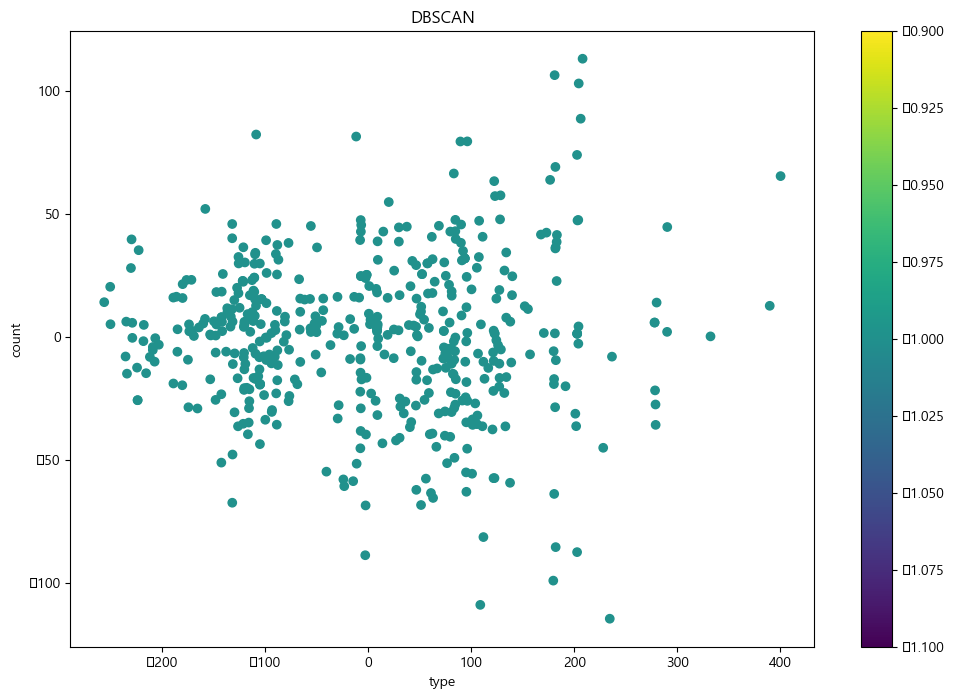

In [124]:
# DBSCAN 군집화 정규화(StandardScaler)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_dropped_single = df_dropped_single.drop(columns=['total_points_bin', 'max_total_per_single_type'], axis=1)

numeric_columns = df_dropped_single.select_dtypes(include=['int64', 'float64']).columns
X = df_dropped_single[numeric_columns]

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels = dbscan.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN')
plt.xlabel('type')
plt.ylabel('count')
plt.colorbar(scatter)
plt.show()

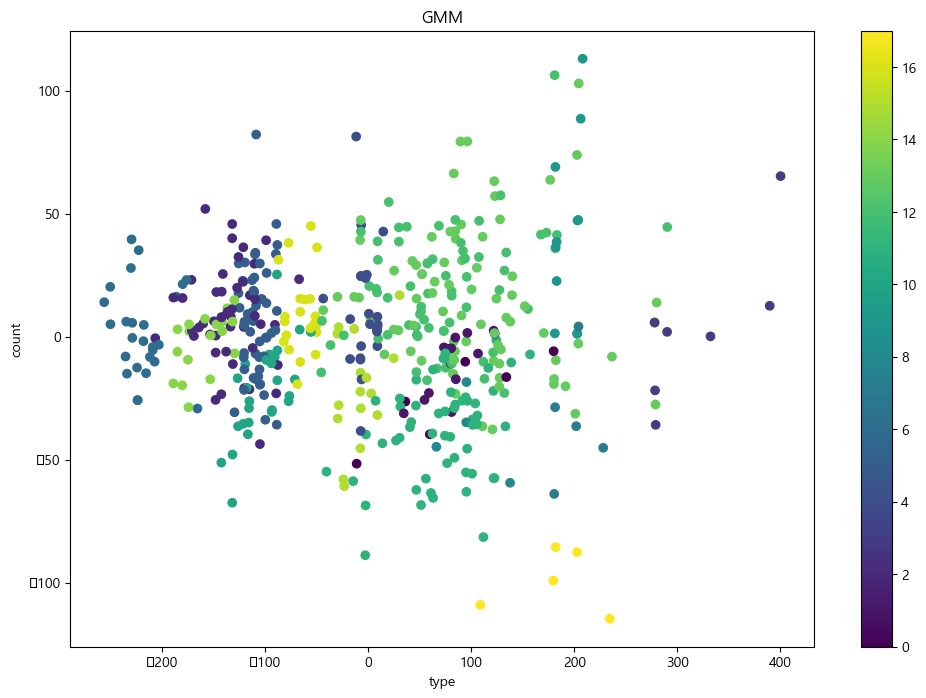

In [125]:
# GMM(가우시안) 군집화

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numeric_columns = df_dropped_single.select_dtypes(include=['int64', 'float64']).columns
X = df_dropped_single[numeric_columns]


# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

gm = GaussianMixture(n_components=18, random_state=42)
gm.fit(X)
labels = gm.predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('GMM')
plt.xlabel('type')
plt.ylabel('count')
plt.colorbar(scatter)
plt.show()

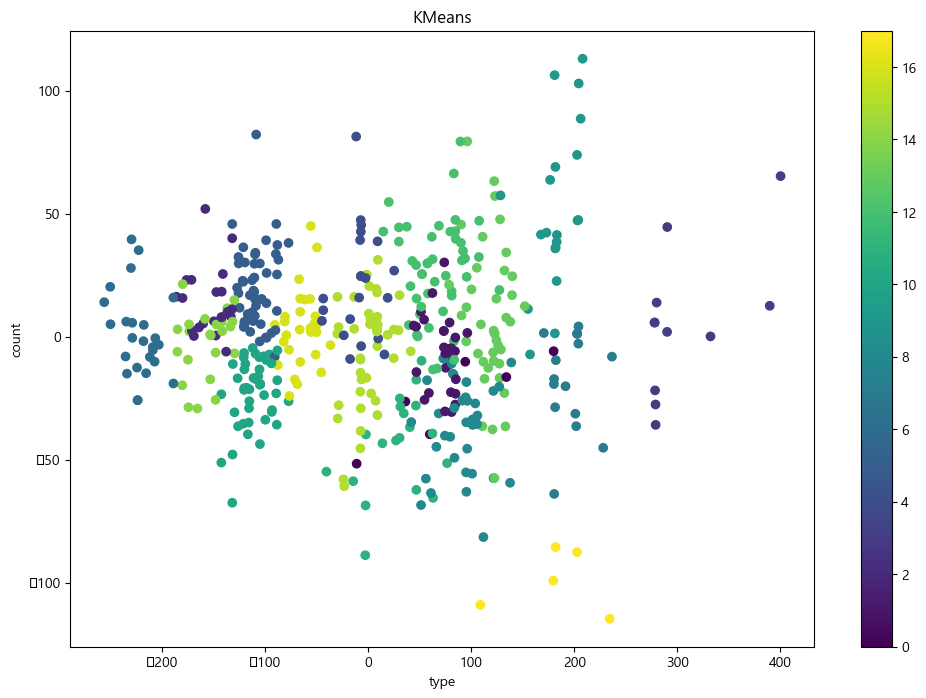

In [126]:
# KMeans 군집화

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_dropped_single[df_dropped_single.select_dtypes(include=['int64', 'float64']).columns]
y = df_dropped_single['type_only']

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

kmeans = KMeans(
    n_clusters=18,
    init='k-means++',
    max_iter=10000,
    
    random_state=42
)
kmeans.fit(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans')
plt.xlabel('type')
plt.ylabel('count')
plt.colorbar(scatter)
plt.show()


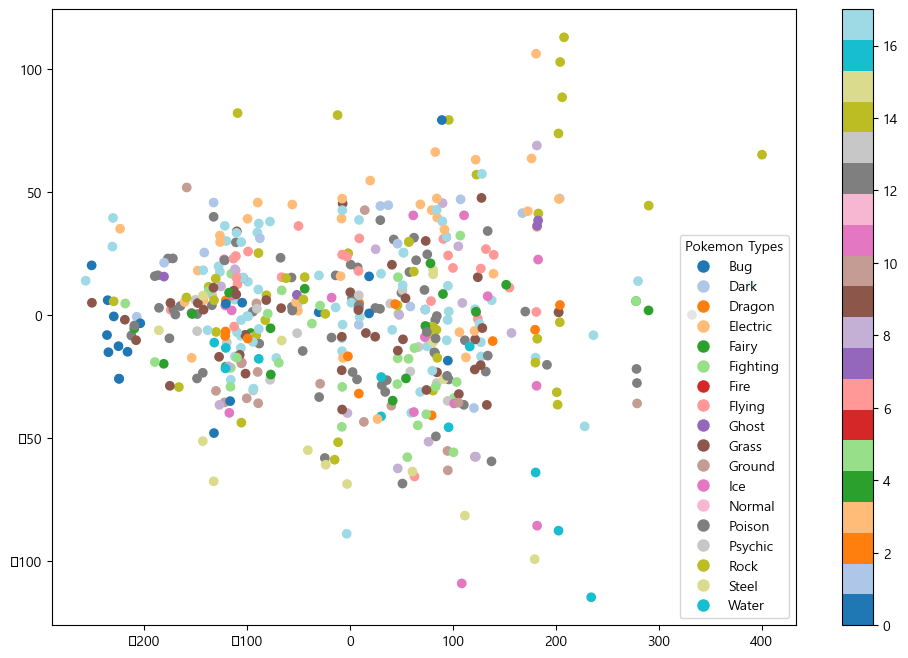

In [127]:
# LabelEncoder 군집화

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


numeric_columns = df_dropped_single.select_dtypes(include=['int64', 'float64']).columns

X = df_dropped_single[numeric_columns]

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

le = LabelEncoder()
type_labels = le.fit_transform(df_dropped_single['type_only'])

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=type_labels, cmap='tab20')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=plt.cm.tab20(i/18), 
                            label=type_name, markersize=10)
                  for i, type_name in enumerate(le.classes_)]
plt.legend(handles=legend_elements, title='Pokemon Types')
plt.colorbar(scatter)
plt.show()

# 비지도 학습(이중 속성)

---

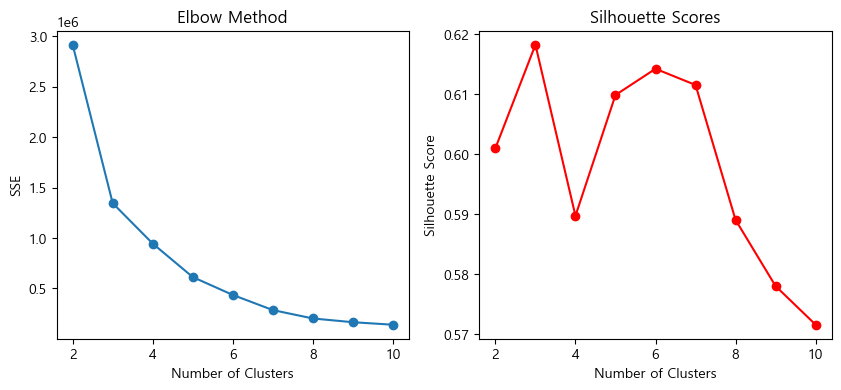

In [128]:
# 군집화 - 실루엣 (Sihouette)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 수치형 데이터 선택
num_col = ["total_points"]
df_numeric = df_dropped_double[num_col]

# 데이터 정규화
# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df_numeric)

# 최적의 k 값 찾기 (Elbow Method)
sse = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    # kmeans = KMeans(
    #   n_clusters=7,    # 클러스터 개수 (= 중심점 개수)
    #   init='k-means++',    # 초기 중심점 설정 방식
    #   max_iter=300,     # 최대 반복 횟수
    #   random_state=0)
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_numeric)
    sse.append(kmeans.inertia_)

    # 실루엣 점수 계산
    sil_score = silhouette_score(df_numeric, clusters)
    silhouette_scores.append(sil_score)

# print(sil_score, '\n')
# print(silhouette_scores)

# Elbow Method 그래프
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")

# 실루엣 점수 그래프
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='red')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")

plt.show()

In [129]:
# 모든 데이터 전처리

df_dropped_double.data = df_dropped_double.drop(columns=['name', 'type_mix', 'total_points_bin', 'max_total_per_double_type', 'label'])
df_dropped_double.target = df_dropped_double['type_mix']

In [130]:
df_dropped_double.data

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
6,534,78,84,78,109,85,100
...,...,...,...,...,...,...,...
1036,550,100,130,100,63,60,97
1037,600,105,120,105,70,95,105
1042,500,100,80,80,80,80,80
1043,680,100,165,150,85,130,50


In [131]:
# K-평균 군집 모델

# 데이터 정규화
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_dropped_double.data)

kmeans = KMeans(
    n_clusters=7,                       # 클러스터 개수 (= 중심점 개수)
    init='k-means++',                   # 초기 중심점 설정 방식
    max_iter=1000,                      # 최대 반복 횟수
    random_state=42
)
kmeans.fit(df_scaled)      # 중심점 찾기
distances = kmeans.transform(df_scaled)    # 중심점과의 거리 계산 및 반환
distances

array([[0.1343848 , 0.80384257, 0.5009528 , ..., 0.47793022, 0.46340946,
        0.38313576],
       [0.26688001, 0.6041943 , 0.35194891, ..., 0.30993363, 0.37528063,
        0.19133679],
       [0.53014809, 0.33669255, 0.28382632, ..., 0.22971202, 0.41359259,
        0.15047428],
       ...,
       [0.44644679, 0.43394661, 0.20678071, ..., 0.21156104, 0.39027836,
        0.19448513],
       [0.9503631 , 0.54989129, 0.53517794, ..., 0.78039231, 0.56895887,
        0.65881397],
       [1.08058567, 0.44228602, 0.80545071, ..., 0.61624141, 0.99717491,
        0.73943729]], shape=(553, 7))

In [132]:
# 군집화 결과
df_dropped_double['type_mix'] = kmeans.labels_
df_dropped_double.groupby('total_points')['type_mix'].value_counts()

total_points  type_mix
185           0           1
190           0           1
195           0           1
198           0           1
205           0           1
                         ..
720           3           2
754           1           1
770           1           1
780           1           2
1125          1           1
Name: count, Length: 272, dtype: int64

In [133]:
# 시각화를 위해 PCA 2개의 주성분으로 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)               # 능력치에 따른 2개의 컴포넌트 지정
pca_transformed = pca.fit_transform(df_scaled)
df_dropped_double['pca1'] = pca_transformed[:, 0]
df_dropped_double['pca2'] = pca_transformed[:, 1]

In [134]:
print(kmeans.cluster_centers_)    # 클러스터의 중심점

# pca 기반 2차원 변환
centers = pca.transform(kmeans.cluster_centers_)
centers

[[0.13152296 0.19454517 0.24850146 0.16539754 0.21838235 0.13667048
  0.2971562 ]
 [0.48572367 0.36930106 0.60973937 0.35040714 0.70951344 0.34975845
  0.60398248]
 [0.33772704 0.3386787  0.56280488 0.31873378 0.33787661 0.23244963
  0.44083399]
 [0.43404255 0.32564679 0.72195767 0.33009119 0.33389356 0.30517598
  0.74070661]
 [0.31012076 0.27042988 0.37312312 0.21345601 0.45317965 0.23407756
  0.63626853]
 [0.30888495 0.25371829 0.41234568 0.50086682 0.3043573  0.31175523
  0.22281959]
 [0.31721253 0.30996196 0.3525593  0.28324169 0.51870456 0.30478749
  0.35578108]]


array([[-0.36775077,  0.04557216],
       [ 0.4664744 ,  0.01990396],
       [ 0.0756875 , -0.06135392],
       [ 0.33230003,  0.08181735],
       [ 0.08230976,  0.20479644],
       [-0.07554382, -0.30086356],
       [ 0.03278044, -0.04645658]])

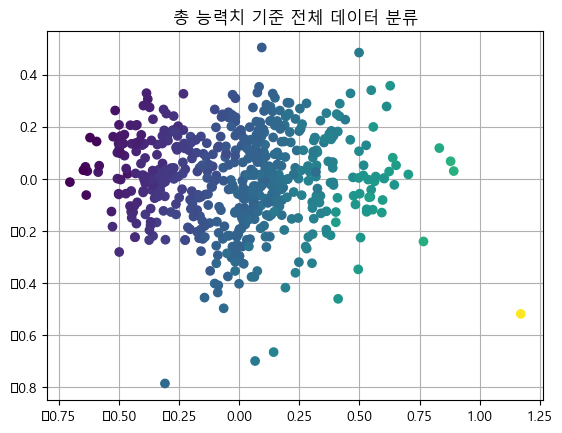

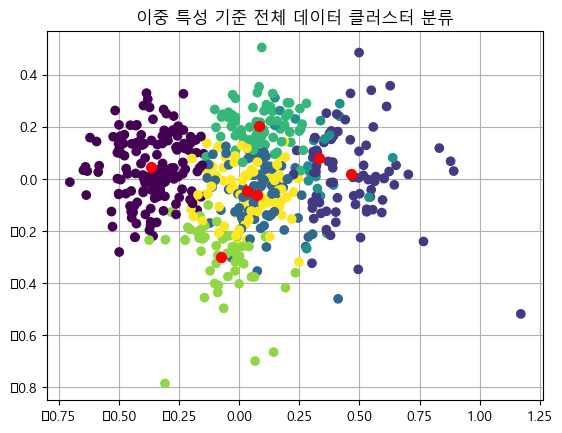

In [135]:
# 총 능력치 (total_points: 라벨 데이터) 기준 시각화
plt.scatter(x=df_dropped_double['pca1'], y=df_dropped_double['pca2'], c=df_dropped_double['total_points'], zorder=5)
plt.title('총 능력치 기준 전체 데이터 분류')
plt.grid(zorder=1)
plt.show()

# 이중 특성 (type_mix: kmeans 군집 데이터) 기준 시각화
plt.scatter(x=df_dropped_double['pca1'], y=df_dropped_double['pca2'], c=df_dropped_double['type_mix'], zorder=5)
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='r', s=50, zorder=5)
plt.title('이중 특성 기준 전체 데이터 클러스터 분류')
plt.grid(zorder=1)
plt.show()

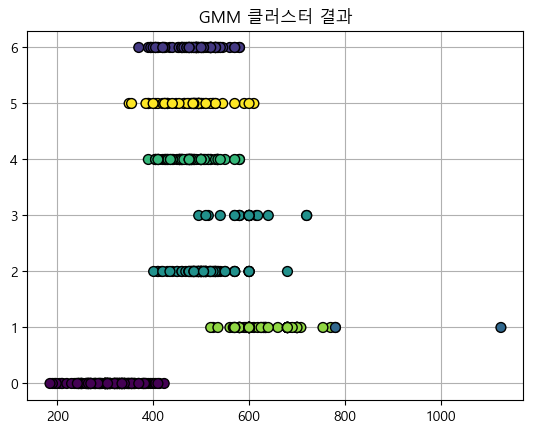

In [136]:
# 가우시안 혼합 모델
from sklearn.mixture import GaussianMixture

# 클러스터링에 사용할 특성 데이터 선택 (총 능력치, 이중 특성)
X = df_dropped_double[['total_points', 'type_mix']]

# 데이터 정규화
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)

# GMM 모델 학습
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(df_scaled)

# 클러스터 레이블 예측
labels = gmm.predict(df_scaled)

# 산점도로 시각화
plt.scatter(X['total_points'], X['type_mix'], c=labels, s=50, edgecolors='k', zorder=5)
plt.title('GMM 클러스터 결과')
plt.grid(zorder=1)
plt.show()

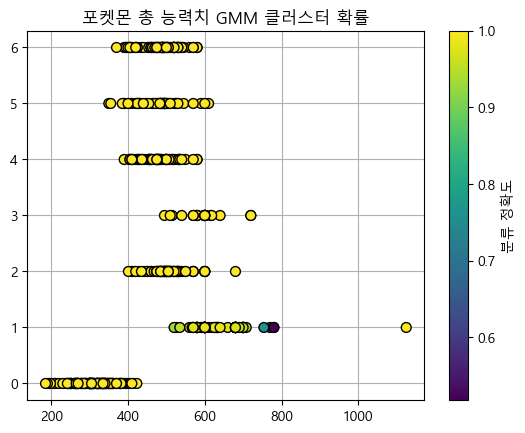

In [137]:
probs = gmm.predict_proba(df_scaled)
plt.scatter(X['total_points'], X['type_mix'], c=probs.max(axis=1), s=50, edgecolors='k', zorder=5)
plt.title('포켓몬 총 능력치 GMM 클러스터 확률')
plt.colorbar(label='분류 정확도')
plt.grid(zorder=1)
plt.show()

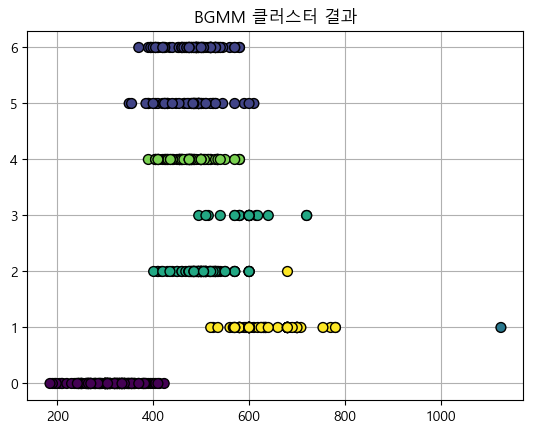

In [138]:
# 베이시안 가우시안 혼합 모델
from sklearn.mixture import BayesianGaussianMixture

# 클러스터링에 사용할 특성 데이터 선택 (총 능력치, 이중 특성)
X = df_dropped_double[['total_points', 'type_mix']]

# 데이터 정규화
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)

# BGMM 모델 학습
bgmm = BayesianGaussianMixture(n_components=7, random_state=42)
bgmm.fit(df_scaled)

# 클러스터 레이블 예측
labels = bgmm.predict(df_scaled)

# 산점도로 시각화
plt.scatter(X['total_points'], X['type_mix'], c=labels, s=50, edgecolors='k', zorder=5)
plt.title('BGMM 클러스터 결과')
plt.grid(zorder=1)
plt.show()

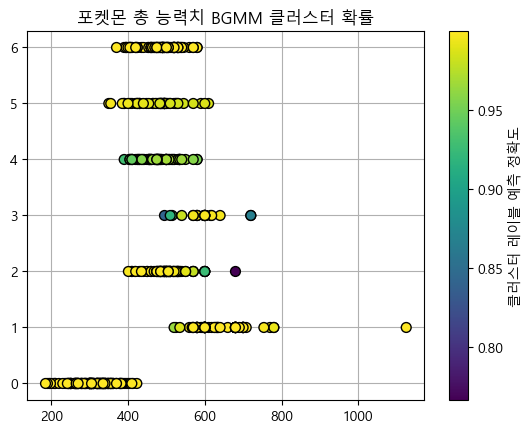

In [139]:
probs = bgmm.predict_proba(df_scaled)
plt.scatter(X['total_points'], X['type_mix'], c=probs.max(axis=1), s=50, edgecolors='k', zorder=5)
plt.title('포켓몬 총 능력치 BGMM 클러스터 확률')
plt.colorbar(label='클러스터 레이블 예측 정확도')
plt.grid(zorder=1)
plt.show()

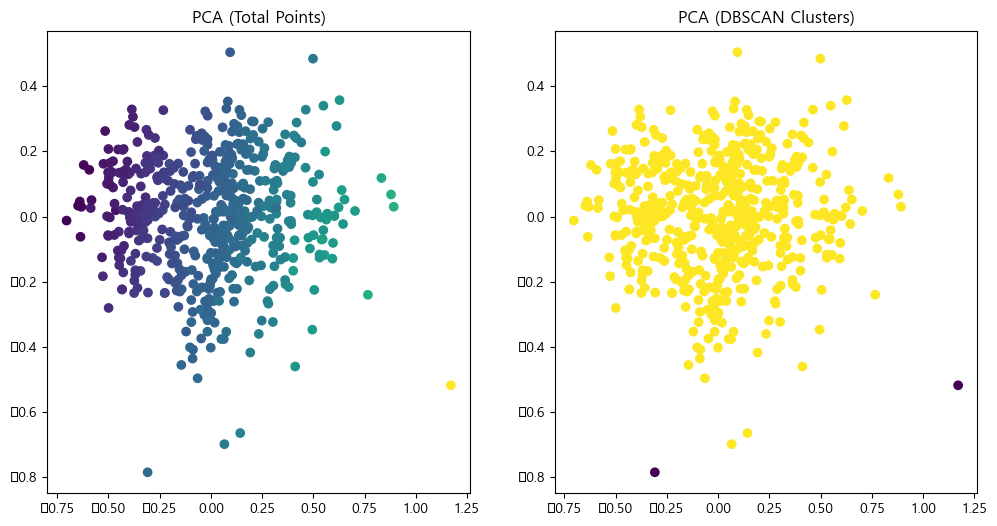

In [140]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 수치형 데이터 선택 (문자열 제외)
X = df_dropped_double.data

# 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 군집화
dbscan = DBSCAN(eps=0.6, min_samples=4)
df_dropped_double['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# PCA 변환 (차원 축소)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_scaled)
df_dropped_double['pca1'] = pca_transformed[:, 0]
df_dropped_double['pca2'] = pca_transformed[:, 1]

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# PCA 시각화 (Total Points 기준)
ax[0].scatter(df_dropped_double['pca1'], df_dropped_double['pca2'], c=df_dropped_double['total_points'], cmap='viridis')
ax[0].set_title('PCA (Total Points)')

# PCA 시각화 (DBSCAN Clusters 기준)
ax[1].scatter(df_dropped_double['pca1'], df_dropped_double['pca2'], c=df_dropped_double['dbscan_cluster'], cmap='viridis')        
ax[1].set_title('PCA (DBSCAN Clusters)')

plt.show()

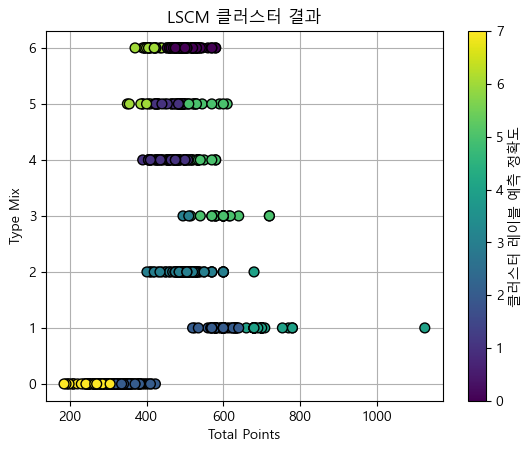

In [141]:
# 라플라시안 스펙트럴 클러스터링 모델
from sklearn.cluster import SpectralClustering

# 클러스터링에 사용할 특성 데이터 선택 (총 능력치, 이중 특성)
X = df_dropped_double[['total_points', 'type_mix']]

# 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# LSCM 모델 학습
lscm = SpectralClustering(n_components=7, random_state=42)
lscm.fit(X_scaled)

# 클러스터 레이블 예측
labels = lscm.fit_predict(X_scaled)

# 산점도로 시각화
plt.scatter(X['total_points'], X['type_mix'], c=labels, s=50, edgecolors='k', zorder=5)
plt.title('LSCM 클러스터 결과')
plt.xlabel('Total Points')
plt.ylabel('Type Mix')
plt.colorbar(label='클러스터 레이블 예측 정확도')           # 컬러바 추가
plt.grid(zorder=1)
plt.show()